# 3-Layer Neural Network for Non-linear Regression (PyTorch Implementation from Scratch)

This notebook implements a 3-layer neural network using PyTorch but without relying on PyTorch's built-in layer functionality. We'll implement the forward and backward passes manually while leveraging PyTorch's automatic differentiation capabilities.

We'll use the same 3-variable non-linear function for our synthetic dataset to maintain consistency with the NumPy implementation.

In [1]:
# Import necessary libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define the function to generate synthetic data
def true_function(X):
    """
    Non-linear function with 3 variables
    X should be a matrix with 3 columns
    """
    return 2 * torch.sin(X[:, 0]) + 3 * torch.cos(X[:, 1]) + 0.5 * X[:, 2]**2 + 0.1 * X[:, 0] * X[:, 1] * X[:, 2]

# Generate synthetic dataset
def generate_data(n_samples=1000):
    # Generate random inputs
    X = torch.FloatTensor(np.random.uniform(-2, 2, (n_samples, 3)))

    # Calculate true output values
    y_true = true_function(X)

    # Add some noise
    y = y_true + torch.FloatTensor(np.random.normal(0, 0.5, n_samples))

    return X, y.reshape(-1, 1)

# Generate training data
X_train, y_train = generate_data(1000)

# Generate test data
X_test, y_test = generate_data(200)

print(f"Training data shape: X = {X_train.shape}, y = {y_train.shape}")
print(f"Test data shape: X = {X_test.shape}, y = {y_test.shape}")

Training data shape: X = torch.Size([1000, 3]), y = torch.Size([1000, 1])
Test data shape: X = torch.Size([200, 3]), y = torch.Size([200, 1])


## Neural Network Implementation with PyTorch (Manual)

Now we'll implement our 3-layer neural network without using PyTorch's built-in layers. Instead, we'll manually define the weights and biases as PyTorch tensors, and use PyTorch's autograd capabilities for gradient computation.

1. We'll define the model parameters (weights and biases)
2. Implement the forward pass
3. Use PyTorch's built-in loss function and autograd for backpropagation
4. Implement the training loop

In [3]:
# Define the network architecture (manually implemented)
class ManualNeuralNetwork:
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size):
        # Initialize weights and biases
        self.W1 = torch.randn(input_size, hidden1_size) * torch.sqrt(torch.tensor(2.0/input_size))
        self.b1 = torch.zeros(hidden1_size)

        self.W2 = torch.randn(hidden1_size, hidden2_size) * torch.sqrt(torch.tensor(2.0/hidden1_size))
        self.b2 = torch.zeros(hidden2_size)

        self.W3 = torch.randn(hidden2_size, output_size) * torch.sqrt(torch.tensor(2.0/hidden2_size))
        self.b3 = torch.zeros(output_size)

        # Make parameters require gradient
        self.W1.requires_grad_(True)
        self.b1.requires_grad_(True)
        self.W2.requires_grad_(True)
        self.b2.requires_grad_(True)
        self.W3.requires_grad_(True)
        self.b3.requires_grad_(True)

        # Store all parameters in a list for optimization
        self.parameters = [self.W1, self.b1, self.W2, self.b2, self.W3, self.b3]

    def forward(self, X):
        # First hidden layer with ReLU activation
        self.z1 = torch.matmul(X, self.W1) + self.b1
        self.a1 = torch.relu(self.z1)

        # Second hidden layer with ReLU activation
        self.z2 = torch.matmul(self.a1, self.W2) + self.b2
        self.a2 = torch.relu(self.z2)

        # Output layer (linear activation for regression)
        self.z3 = torch.matmul(self.a2, self.W3) + self.b3

        return self.z3

    def zero_grad(self):
        # Manually zero gradients
        for param in self.parameters:
            if param.grad is not None:
                param.grad.zero_()

    def step(self, learning_rate):
        # Manually update parameters
        with torch.no_grad():
            for param in self.parameters:
                param -= learning_rate * param.grad

# Create an instance of the neural network
input_size = 3
hidden1_size = 10
hidden2_size = 5
output_size = 1

model = ManualNeuralNetwork(input_size, hidden1_size, hidden2_size, output_size)

# Define the loss function (Mean Squared Error)
def mse_loss(y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

# Define training parameters
num_epochs = 3000
learning_rate = 0.005
print_interval = 100

# Training loop
losses = []

start_time = time.time()
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model.forward(X_train)

    # Compute loss
    loss = mse_loss(y_pred, y_train)

    # Zero gradients
    model.zero_grad()

    # Backward pass (Compute gradients)
    loss.backward()

    # Update parameters
    model.step(learning_rate)

    # Print progress
    if epoch % print_interval == 0:
        print(f"Epoch {epoch}/{num_epochs}, Loss: {loss.item():.6f}")

    # Store loss value
    if epoch % 10 == 0:
        losses.append(loss.item())

end_time = time.time()
print(f"Training completed in {end_time - start_time:.2f} seconds")

Epoch 0/3000, Loss: 11.091629
Epoch 100/3000, Loss: 2.723417
Epoch 200/3000, Loss: 2.045943
Epoch 300/3000, Loss: 1.626953
Epoch 400/3000, Loss: 1.381970
Epoch 500/3000, Loss: 1.168696
Epoch 600/3000, Loss: 0.960512
Epoch 700/3000, Loss: 0.790174
Epoch 800/3000, Loss: 0.682347
Epoch 900/3000, Loss: 0.617060
Epoch 1000/3000, Loss: 0.571675
Epoch 1100/3000, Loss: 0.534677
Epoch 1200/3000, Loss: 0.505557
Epoch 1300/3000, Loss: 0.478239
Epoch 1400/3000, Loss: 0.458385
Epoch 1500/3000, Loss: 0.443918
Epoch 1600/3000, Loss: 0.432630
Epoch 1700/3000, Loss: 0.423330
Epoch 1800/3000, Loss: 0.413604
Epoch 1900/3000, Loss: 0.405727
Epoch 2000/3000, Loss: 0.399370
Epoch 2100/3000, Loss: 0.393541
Epoch 2200/3000, Loss: 0.388606
Epoch 2300/3000, Loss: 0.384259
Epoch 2400/3000, Loss: 0.379658
Epoch 2500/3000, Loss: 0.375731
Epoch 2600/3000, Loss: 0.372189
Epoch 2700/3000, Loss: 0.369020
Epoch 2800/3000, Loss: 0.366119
Epoch 2900/3000, Loss: 0.363180
Training completed in 2.22 seconds


## Model Evaluation and Visualization

Now that we've trained our PyTorch model, let's evaluate its performance on the test set and visualize the training progress and predictions.

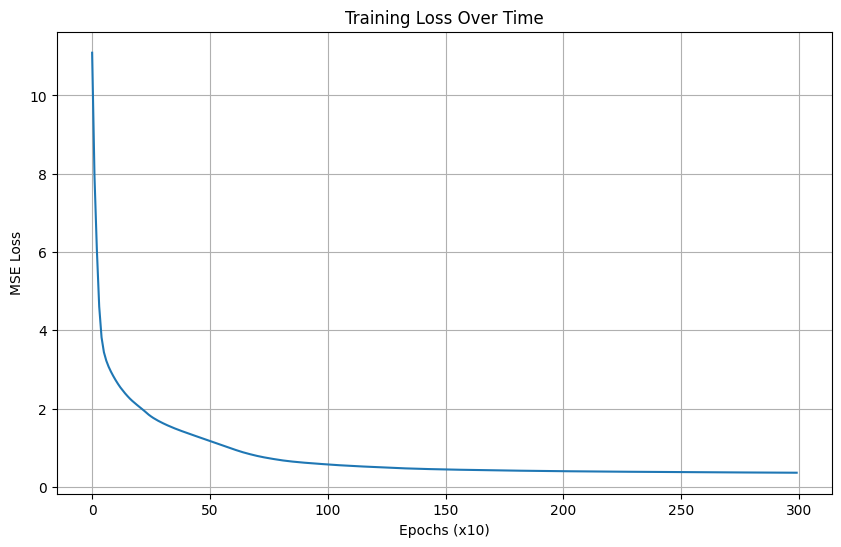

Test MSE Loss: 0.402468


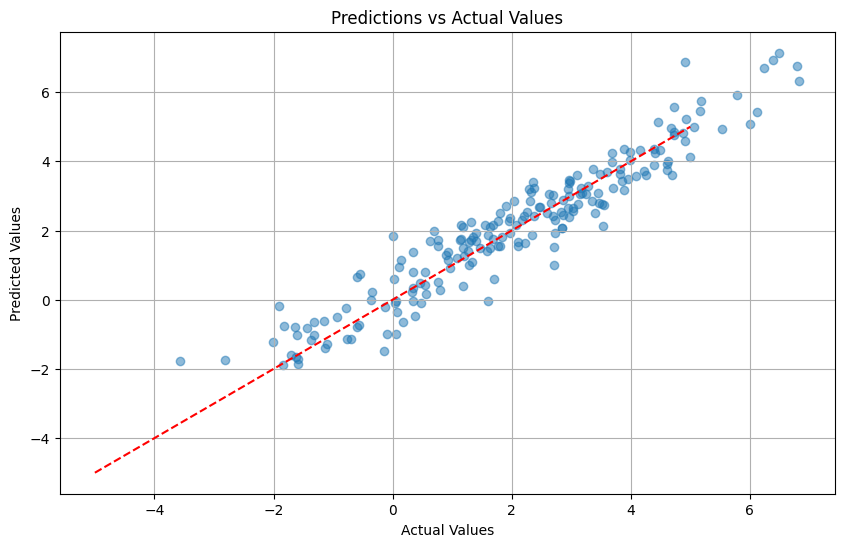

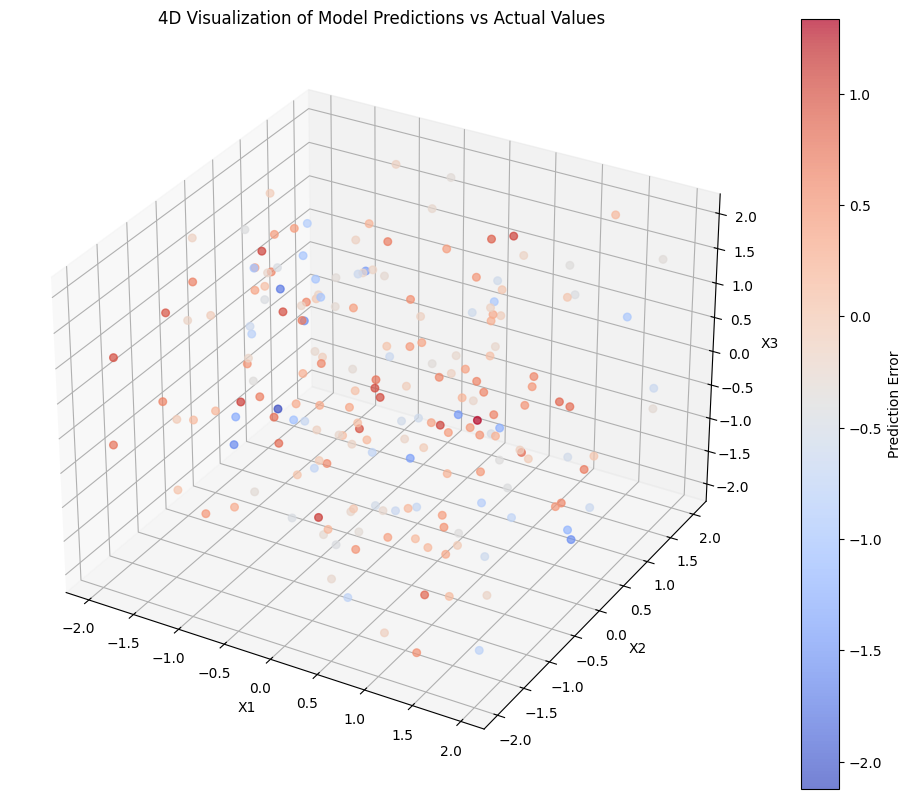

In [4]:
# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel('Epochs (x10)')
plt.ylabel('MSE Loss')
plt.title('Training Loss Over Time')
plt.grid(True)
plt.show()

# Evaluate on test set
with torch.no_grad():
    y_pred_test = model.forward(X_test)
    test_loss = mse_loss(y_pred_test, y_test).item()

print(f"Test MSE Loss: {test_loss:.6f}")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test.numpy(), y_pred_test.numpy(), alpha=0.5)
plt.plot([-5, 5], [-5, 5], 'r--')  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values')
plt.grid(True)
plt.show()

# Create a 4D visualization (3D plot with color as the 4th dimension)
def visualize_4d(X, y_true, y_pred, title):
    # Convert tensors to numpy
    X_np = X.numpy()
    y_true_np = y_true.numpy().flatten()
    y_pred_np = y_pred.numpy().flatten()

    # Create a 3D scatter plot with color as the 4th dimension
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Calculate prediction error for coloring
    error = y_true_np - y_pred_np

    # Create the scatter plot
    scatter = ax.scatter(X_np[:, 0], X_np[:, 1], X_np[:, 2],
                          c=error,  # Use error for coloring
                          cmap=cm.coolwarm,
                          marker='o',
                          alpha=0.7,
                          s=30)

    # Add a color bar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Prediction Error')

    # Set labels and title
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.set_title(title)

    # Show the plot
    plt.show()

# Generate sample data points for visualization
X_vis, y_vis = generate_data(200)

# Get predictions for visualization
with torch.no_grad():
    y_vis_pred = model.forward(X_vis)

# Create 4D visualization
visualize_4d(X_vis, y_vis, y_vis_pred, '4D Visualization of Model Predictions vs Actual Values')

## 2D Slice Visualization

Just like we did in the NumPy implementation, we'll create 2D slice visualizations to better understand how our model performs across different values of our 3 variables.

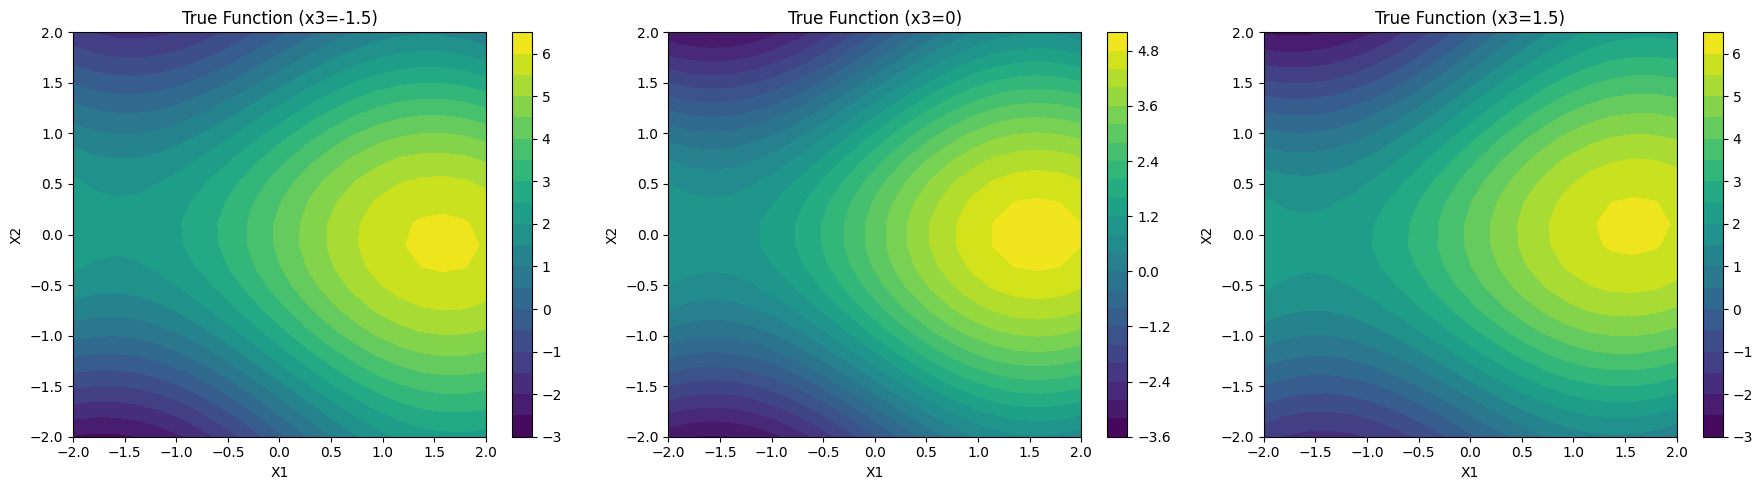

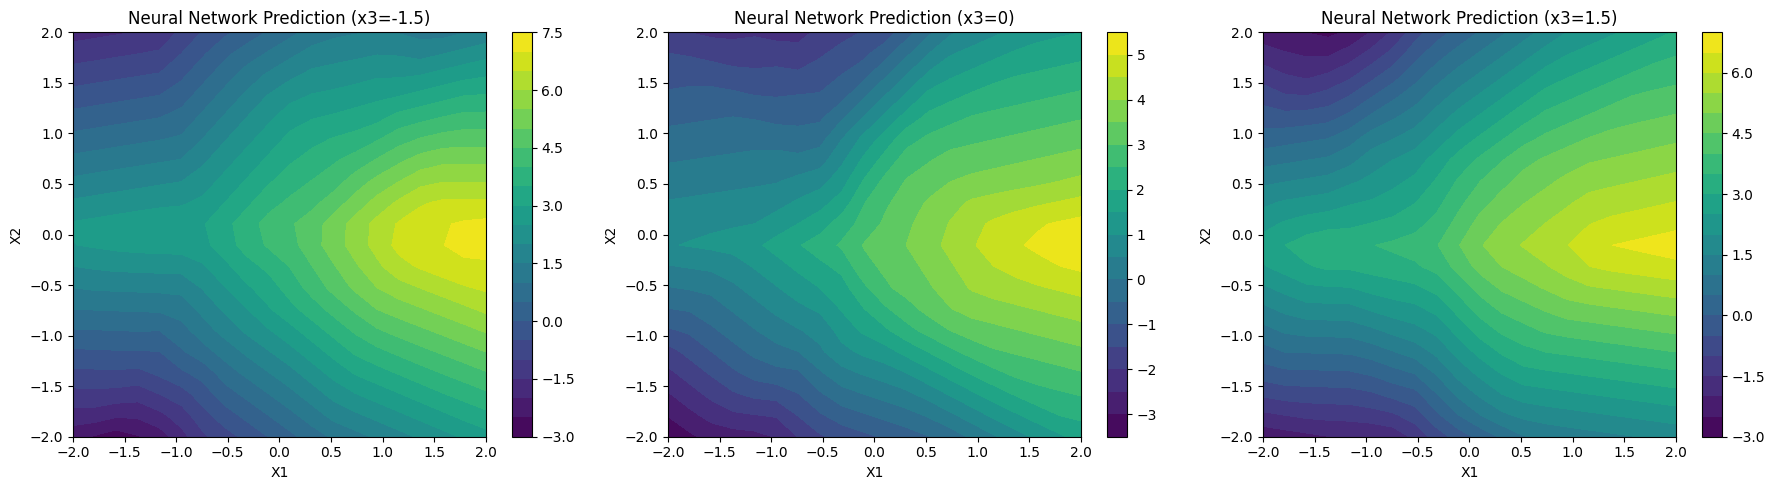

In [5]:
# Alternative visualization with 2D slices
def plot_2d_slices(X_range=2.0, grid_points=20):
    # Create a grid of points for visualization
    x1 = np.linspace(-X_range, X_range, grid_points)
    x2 = np.linspace(-X_range, X_range, grid_points)
    x3_values = [-1.5, 0, 1.5]  # Three fixed values for x3

    fig, axes = plt.subplots(1, len(x3_values), figsize=(18, 5))

    for i, x3 in enumerate(x3_values):
        # Create meshgrid for x1 and x2
        X1, X2 = np.meshgrid(x1, x2)

        # Create input data with fixed x3
        X_input_np = np.zeros((grid_points*grid_points, 3))
        X_input_np[:, 0] = X1.flatten()
        X_input_np[:, 1] = X2.flatten()
        X_input_np[:, 2] = x3

        # Convert to tensor
        X_input = torch.FloatTensor(X_input_np)

        # Get true values and predictions
        with torch.no_grad():
            y_true = true_function(X_input).reshape(grid_points, grid_points)
            y_pred = model.forward(X_input).reshape(grid_points, grid_points)

            # Convert to numpy for plotting
            y_true_np = y_true.numpy()
            y_pred_np = y_pred.numpy()

        # Plot the true function
        im1 = axes[i].contourf(X1, X2, y_true_np, cmap='viridis', levels=20)
        axes[i].set_title(f'True Function (x3={x3})')
        axes[i].set_xlabel('X1')
        axes[i].set_ylabel('X2')

        # Add a colorbar
        plt.colorbar(im1, ax=axes[i])

    plt.tight_layout()
    plt.show()

    # Now plot the predicted function
    fig, axes = plt.subplots(1, len(x3_values), figsize=(18, 5))

    for i, x3 in enumerate(x3_values):
        # Create meshgrid for x1 and x2
        X1, X2 = np.meshgrid(x1, x2)

        # Create input data with fixed x3
        X_input_np = np.zeros((grid_points*grid_points, 3))
        X_input_np[:, 0] = X1.flatten()
        X_input_np[:, 1] = X2.flatten()
        X_input_np[:, 2] = x3

        # Convert to tensor
        X_input = torch.FloatTensor(X_input_np)

        # Get true values and predictions
        with torch.no_grad():
            y_true = true_function(X_input).reshape(grid_points, grid_points)
            y_pred = model.forward(X_input).reshape(grid_points, grid_points)

            # Convert to numpy for plotting
            y_true_np = y_true.numpy()
            y_pred_np = y_pred.numpy()

        # Plot the predicted function
        im2 = axes[i].contourf(X1, X2, y_pred_np, cmap='viridis', levels=20)
        axes[i].set_title(f'Neural Network Prediction (x3={x3})')
        axes[i].set_xlabel('X1')
        axes[i].set_ylabel('X2')

        # Add a colorbar
        plt.colorbar(im2, ax=axes[i])

    plt.tight_layout()
    plt.show()

# Generate and plot 2D slices
plot_2d_slices(X_range=2.0, grid_points=20)

## Summary

In this notebook, we've implemented a 3-layer neural network using PyTorch but without relying on PyTorch's built-in layer functionality. Key accomplishments:

1. We manually defined the model parameters (weights and biases) as PyTorch tensors
2. Implemented the forward pass explicitly
3. Leveraged PyTorch's autograd capabilities for gradient computation
4. Implemented a custom training loop

This approach demonstrates the flexibility of PyTorch while still allowing us to control the implementation details. The key difference from the NumPy implementation is that we didn't need to manually implement backpropagation, as PyTorch's autograd handles this automatically.

The model successfully learned to approximate our non-linear 3-variable function, with performance comparable to our NumPy implementation.